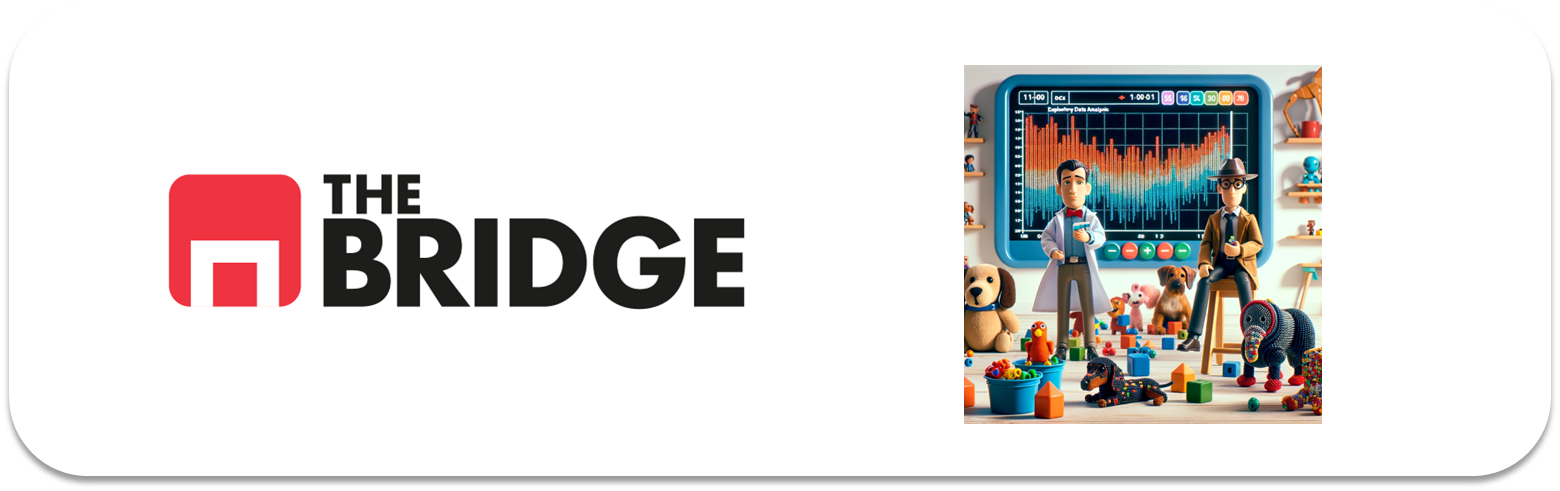

* Hipotesis/Objetivos: Si los tengo perfecto, si no los buscamos
* Estudiar/limpiar/perparar para analisis los datos
* Tabla de variables: definiciones, tipificar, priorizar
* Analisis univariante: 
    * Categoricas : Frecuencias, Moda, Absolutos, Relativos
    * Numericas: Tendencia central ( mediana, media), rangos, posiciones(percentiles-cuartiles. IQR), dispersion, distribución(histograma, densidad probabilidad)
* Analisis bivariante:
    * Categórica-categórica: Chi-2
    * Categórica-numérica: 
        * Categórica binaria: (Prueba Mann-Whitney/t-student)
        * Catagórica no es binaria (ANOVA)
    * Categoricas con cardinalidad controlada: Tabla contingencias
    * Numérica-numérica: Correlación de Pearson
    * Ideas, pregunta, cosas extraordinarias
* Analisis multivariante:
* Paramos y retrospectiva----->lista de verdaderas hipotesis/objetivos
    -Resultados y numeros
* Transmitir respuestas: Mensajes
    - No hay respuestas en los datos
    - Contraste de hipotesis para respaldar nuestros hallazgos
    - La respuesta puede ser No

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import *

from scipy.stats import chi2_contingency, mannwhitneyu


In [ ]:
# import warnings # acallar avisos de pandas

# warnings.filterwarnings("ignore")

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [45]:
df_1 = pd.read_csv("./data/titanic.csv")
df_1.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [46]:
df_1.drop(columns=["deck", "survived", "pclass", "embarked"], inplace=True)
df_1.head(5)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [ ]:
#feature engineering

df_1["family_members"]= df_1["parch"]+df_1["sibsp"]
df_1.drop(columns=["sibsp", "parch"], inplace=True)

In [48]:
df_1

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


In [49]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [50]:
df_1["embark_town"] = df_1["embark_town"].fillna(df_1["embark_town"].mode()[0])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [51]:
df_1["age"] = df_1["age"].fillna(df_1.groupby("who")["age"].transform("mean")) # aplicamos la media del tipo who
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [ ]:
#opcion Rodrigo
es_woman = df_titanic.who == "woman"
es_child = df_titanic.who == "child"
es_man = df_titanic.who == "man"
media_woman = df_titanic.loc[es_woman,"age"].mean()
media_child = df_titanic.loc[es_child,"age"].mean()
media_man = df_titanic.loc[es_man,"age"].mean()
es_age_nulo = df_titanic.age.isna()
df_titanic.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic.loc[es_child & es_age_nulo, "age"] = media_child
df_titanic.loc[es_man & es_age_nulo, "age"] = media_man

In [52]:
df_1.head(5)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

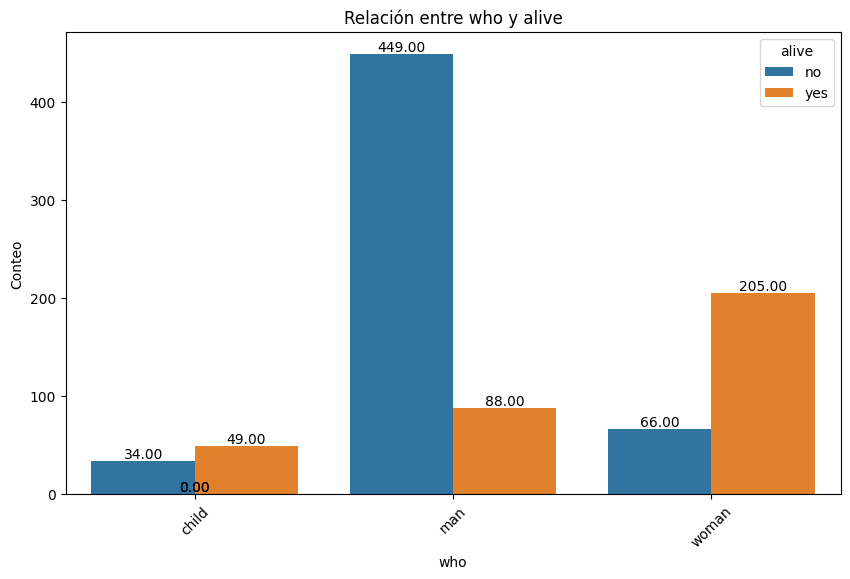

In [53]:
#1  Pintamos los valores absolutos de la variables
plot_categorical_relationship_fin(df_1, "who", "alive", relative_freq=False, show_values=True)
#Sobrevivieron mas mujeres 205, frente a 88 hombre y 49 niños

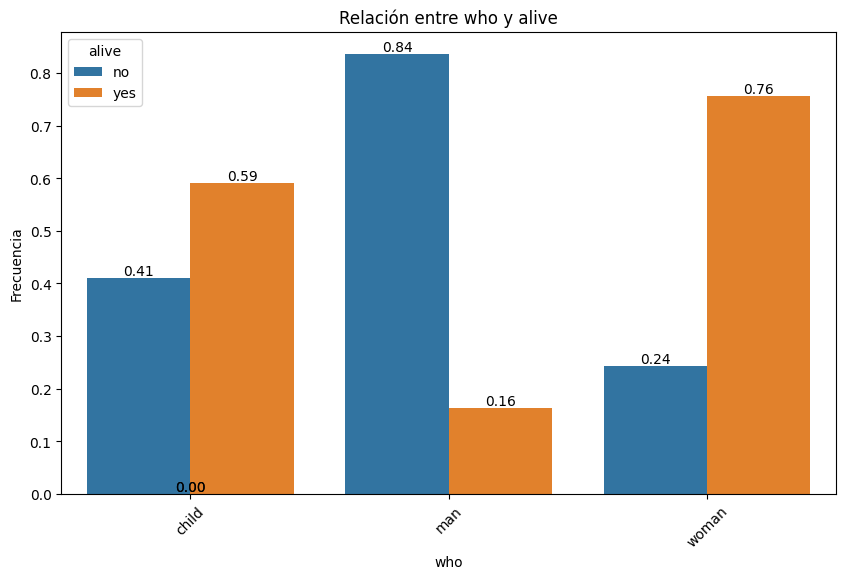

In [54]:
plot_categorical_relationship_fin(df_1, "who", "alive", relative_freq=True, show_values=True)
#Sobrevivieron mas mujeres 205 que supone el 76% de las mujeres, frente a 88 hombres con un 16% de supervivientes y 49 niños con un 59% de supervivientes

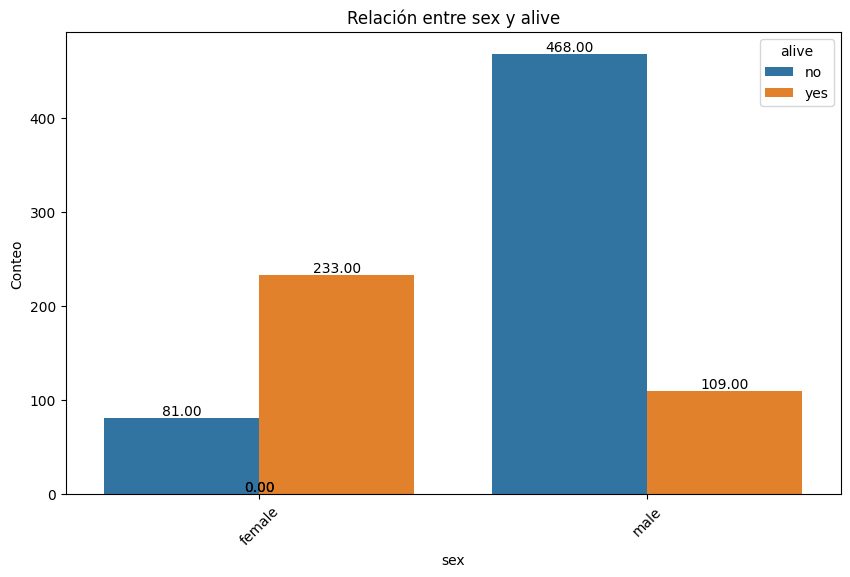

In [55]:
plot_categorical_relationship_fin(df_1, "sex", "alive", relative_freq=False, show_values=True)
    

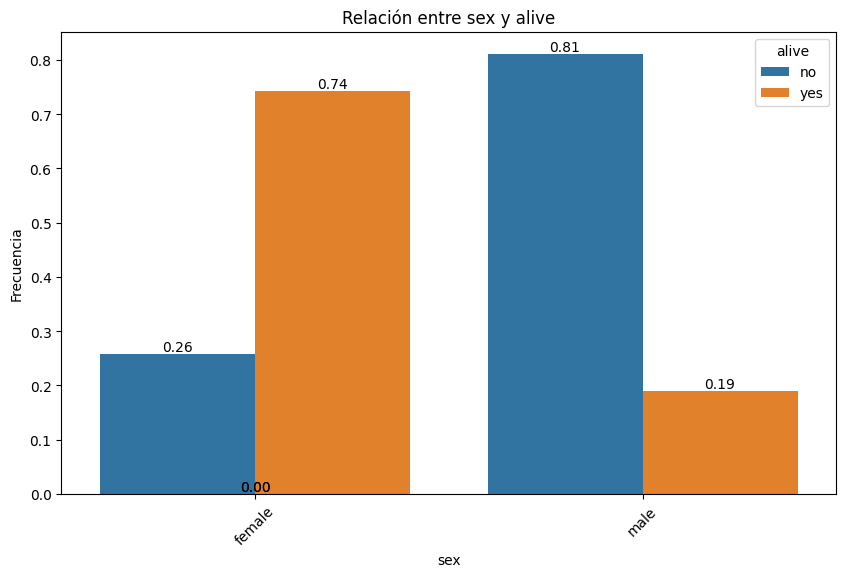

In [56]:
plot_categorical_relationship_fin(df_1, "sex", "alive", relative_freq=True, show_values=True)

In [57]:
# Parece claro que el ser mujer u hombre es significativo para sobrevivir, hay mas mujeres supervivientes en terminos absolutos y relativos

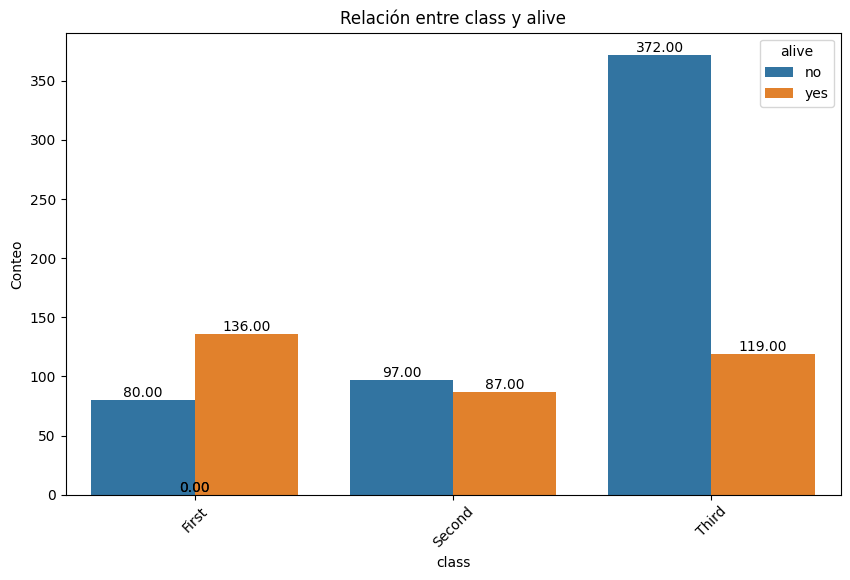

In [58]:
#2  Pintamos los valores absolutos de la variables
plot_categorical_relationship_fin(df_1, "class", "alive", relative_freq=False, show_values=True)
#Sobrevivieron mas 1ª clase 138, frente a 119 3ª clase  y 87 2ª clase

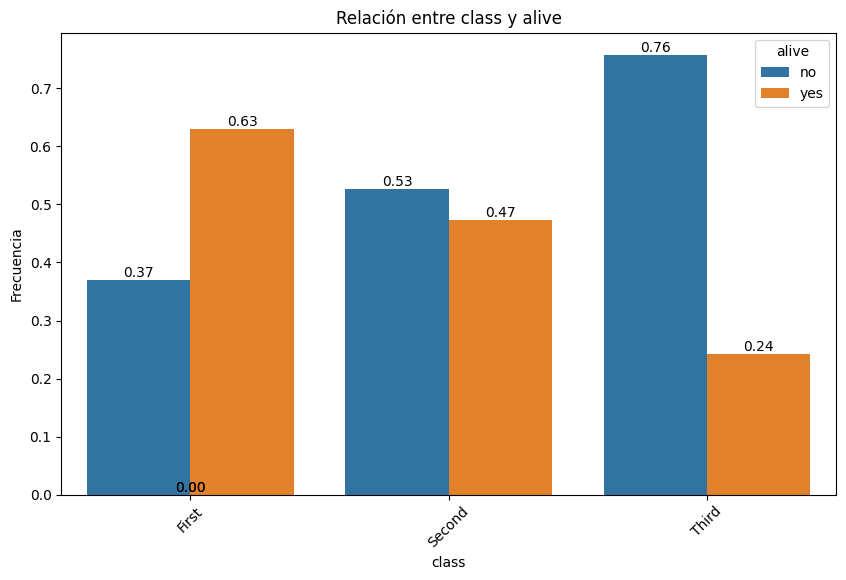

In [59]:
plot_categorical_relationship_fin(df_1, "class", "alive", relative_freq=True, show_values=True)
#Sobrevivieron mas 1ª clase 138 63%, frente a 119 3ª clase 24%  y 87 2ª clase 47%. Esta claro que es significativamente relevante la clase para sobrevivir

In [ ]:
#tabla contingencias y chi_2 para confirmarlo 

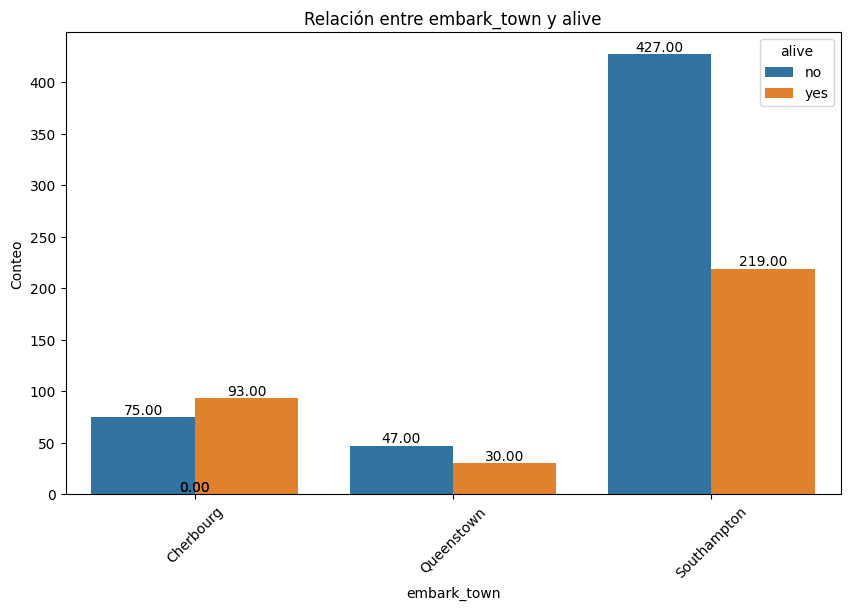

In [60]:
#3  Pintamos los valores absolutos de la variables
plot_categorical_relationship_fin(df_1, "embark_town", "alive", relative_freq=False, show_values=True)
#Sobrevivieron mas embarcados en Southamptom 219, frente a 93 en Cherbourg y 30 en Queenstown

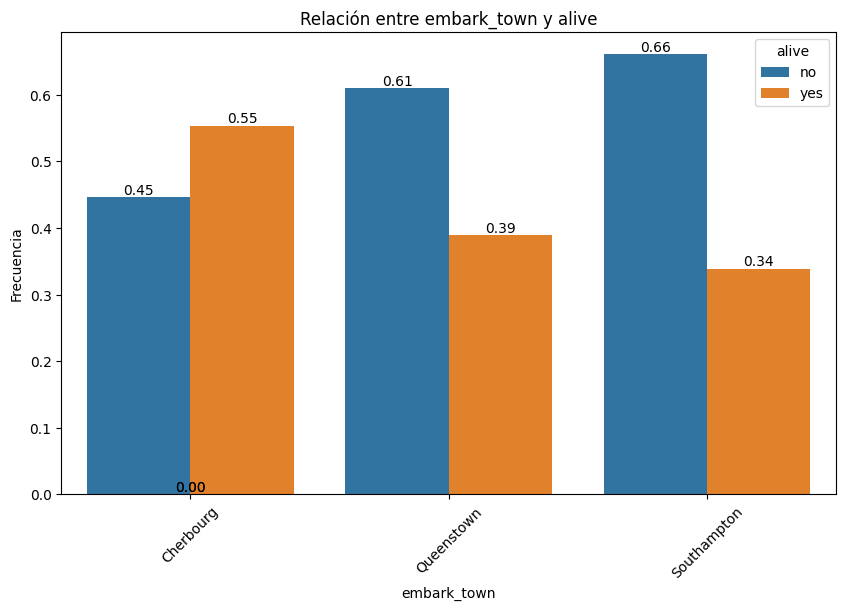

In [61]:
plot_categorical_relationship_fin(df_1, "embark_town", "alive", relative_freq=True, show_values=True)
#Sobrevivieron mas embarcados en Southamptom 219 34% indice supervivencia, frente a 93 en Cherbourg 55% y 30 en Queenstown 39%, 
# parece que embarcar en Cherbourg tiene una mayor probabilidad de sobrevivir 55%

In [ ]:
#tabla contingencia y chi 2-

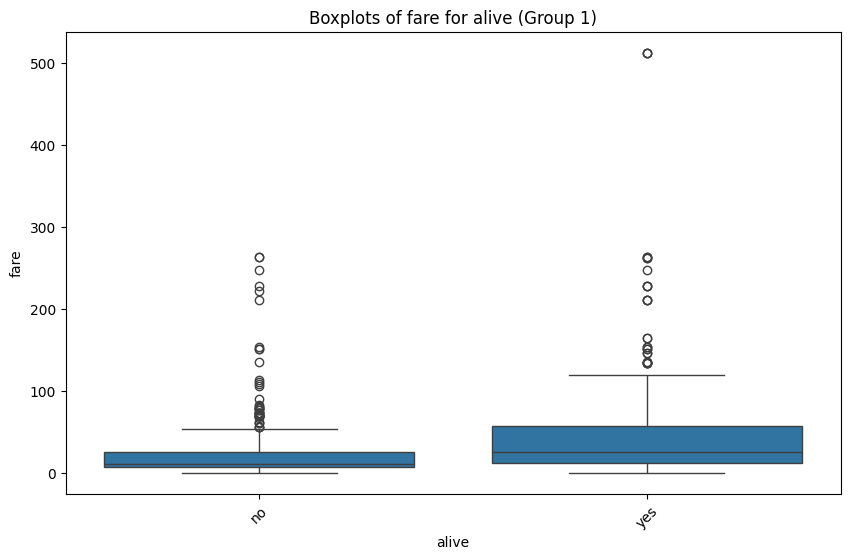

In [62]:
# 4 Relacion precio pasaje y sobrevivir
plot_grouped_boxplots(df_1, "alive", "fare")
#Parece que los que sobrevivieron habian pagado un mayor importe por su pasaje significativamente

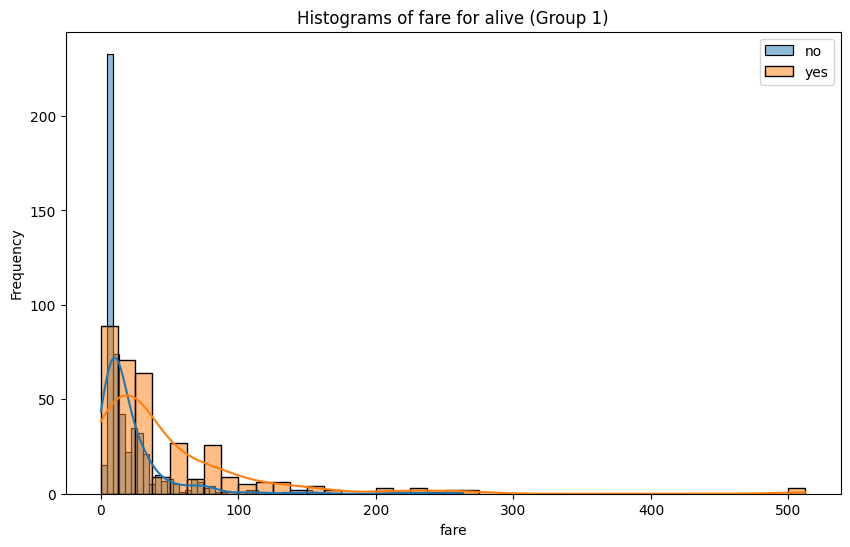

In [90]:
plot_grouped_histograms(df_1, "alive", "fare", group_size=2)

In [ ]:
#pasamos mannwhitney- y nos confirma

In [63]:
# 5 Los pasajeros que no pagaron billete, puede deberse a que son la tripulación del barco o polizones??
df_tripulacion = df_1[df_1.fare == 0]
df_tripulacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 179 to 822
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             15 non-null     object 
 1   age             15 non-null     float64
 2   fare            15 non-null     float64
 3   class           15 non-null     object 
 4   who             15 non-null     object 
 5   adult_male      15 non-null     bool   
 6   embark_town     15 non-null     object 
 7   alive           15 non-null     object 
 8   alone           15 non-null     bool   
 9   family_members  15 non-null     int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 1.1+ KB


In [64]:
#La persona que mas dinero pago:
df_1.loc[df_1["fare"].idxmax()]
#Se salvo :)

sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
Name: 258, dtype: object

Respuesta no:


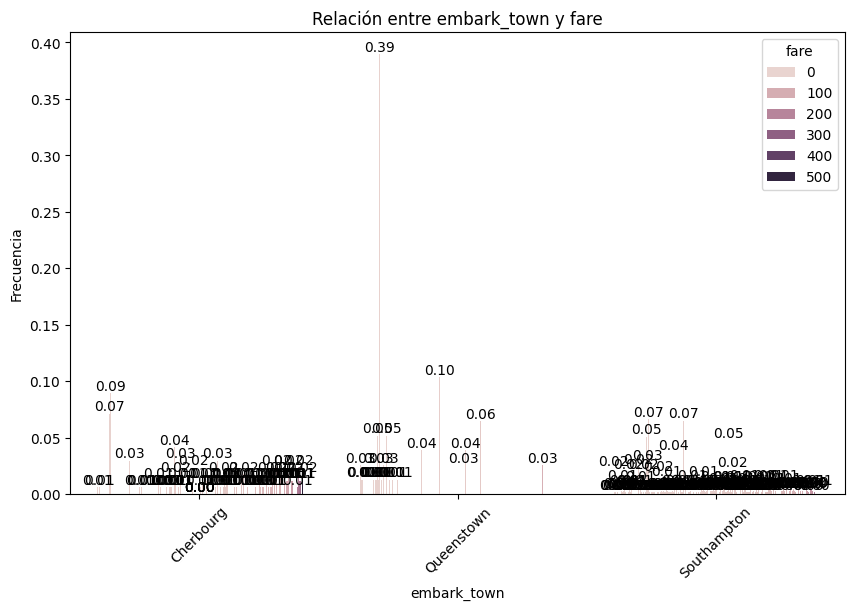

Respuesta yes:


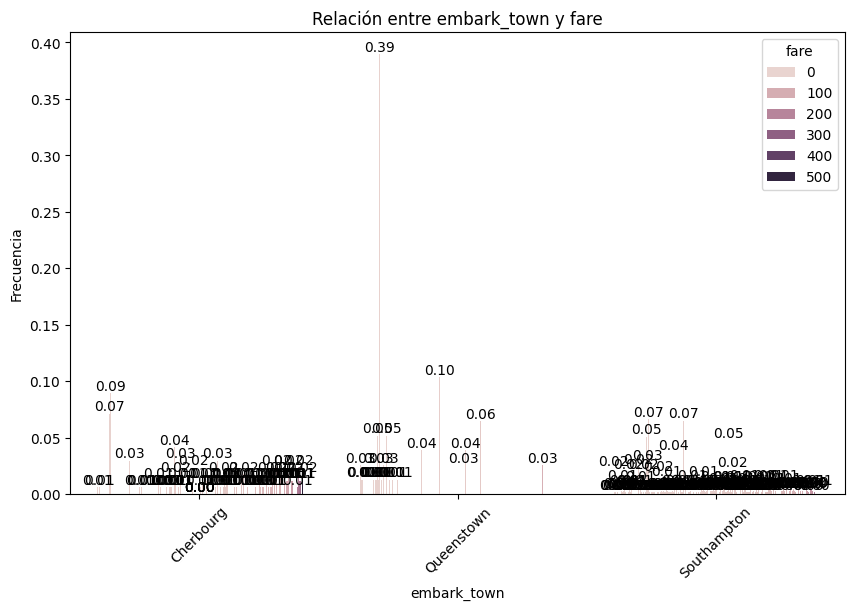

In [65]:
# 6 Relacion fare/embark_town/alive:

columnas = ["alive", "fare", "embark_town"]
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_1[col_directora].unique():
    diccionario_multivariante[valor] = df_1.loc[df_1[col_directora] == valor,[col_2, col_1]]
for valor, df_admisiones in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_1, col_2, col_1, relative_freq=True, show_values=True)

In [ ]:
# Tendriamos que escalar fare para ver resultados
def trivariant_analysis(df, directora, cat2, num1, group_size = 3, bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 
    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_grouped_histograms(df_datos,col_1,col_2, group_size= group_size, bins = bins)

In [67]:
# 7 Que combinacion class y age sobrevivio mas?

# Filtrar los supervivientes
survivors = df_1[df_1["alive"] == "yes"]

# Agrupar por 'class' y 'age', contando las ocurrencias, en terminos absolutos
grouped = survivors[["class", "age"]].value_counts().reset_index(name="contar")
grouped

# Obtener la combinación con mayor número de sobrevivientes
maxima_combinacion = grouped.iloc[0]
print(maxima_combinacion)

class     Third
age        32.0
contar       30
Name: 0, dtype: object


In [ ]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 
    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)

respuesta no


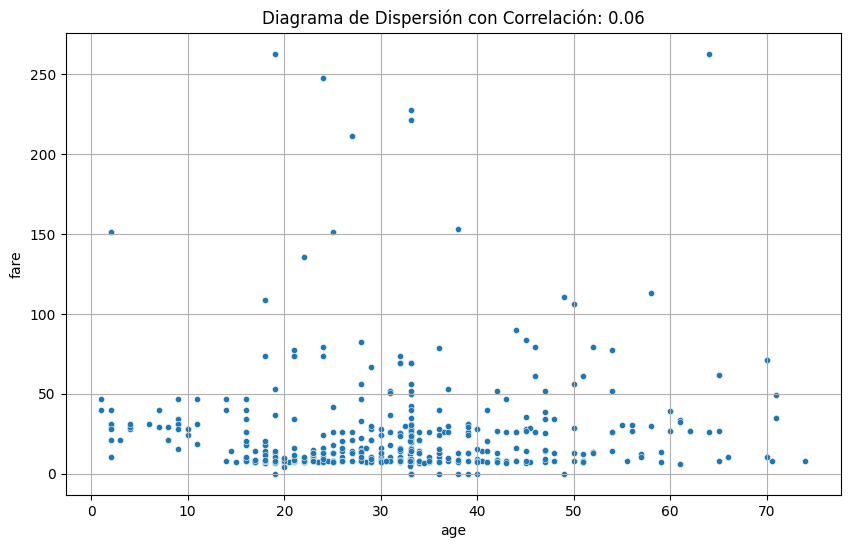

respuesta yes


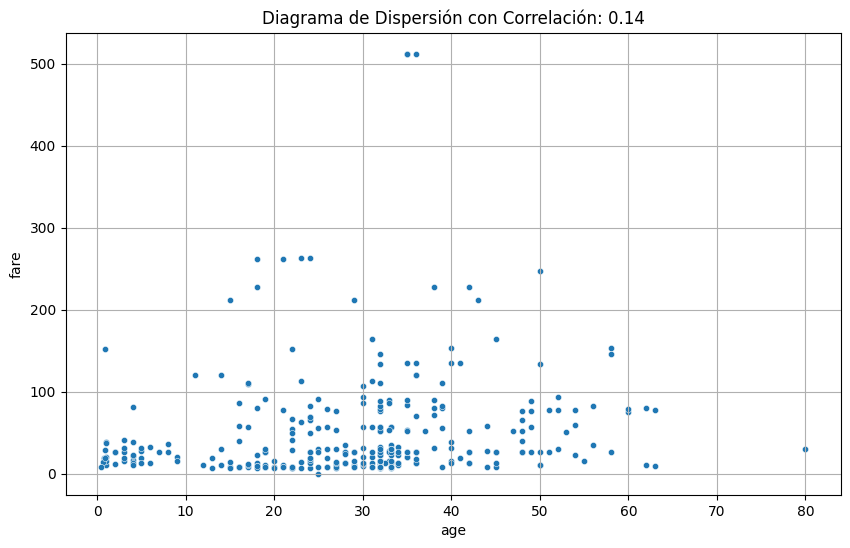

In [91]:
#8 relaciones age, fare, alive, parece que no hay relación significativa
col_directora1 = "alive"
col_1="fare"
col_2="age"
diccionario_multivariante={}
for valor in df_1[col_directora1].unique():
    diccionario_multivariante[valor] =df_1.loc[df_1[col_directora1]==valor,[col_2, col_1]]
for valor, df_datos in diccionario_multivariante.items():
    print(f"respuesta {valor}")
    grafico_dispersion_con_correlacion(df_datos, col_2, col_1, tamano_puntos=20, mostrar_correlacion=True)

In [ ]:
#col_directora = "alive"
#col_1 = "fare"
#col_2 = "age"
#diccionario_multivariante = {}
#for valor in df_titanic[col_directora].unique():
#    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [69]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jun.head(5)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


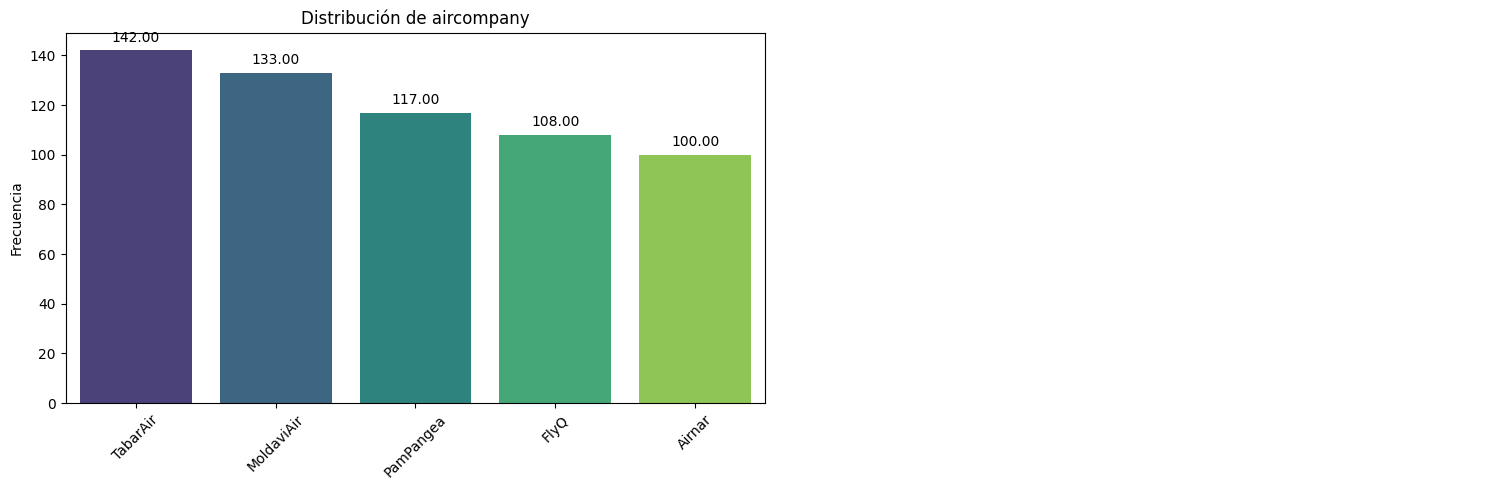

In [70]:
#Viajes por compañia
pinta_distribucion_categoricas(df_air_jun, ["aircompany"], relativa=False, mostrar_valores=True)


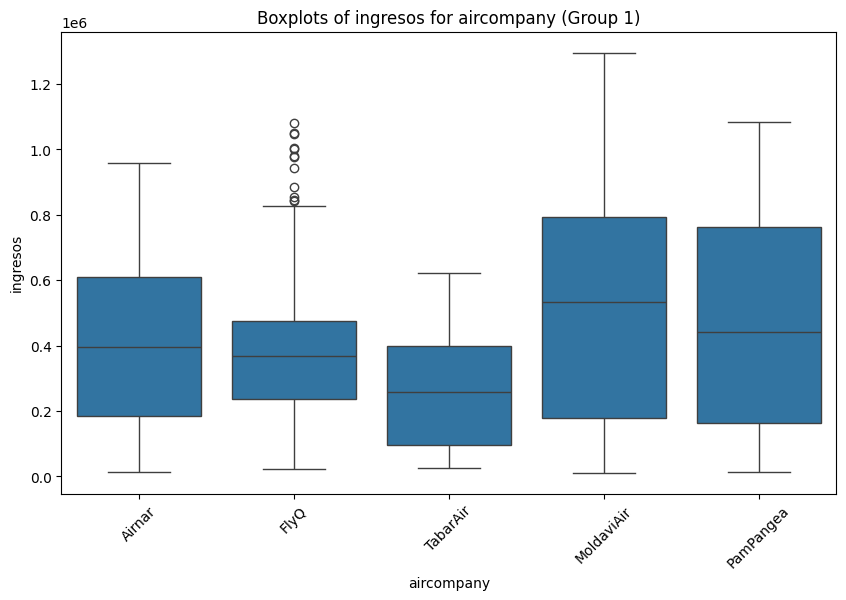

In [71]:
plot_grouped_boxplots(df_air_jun, "aircompany", "ingresos")

In [72]:
# TabarAir tiene vuelos menos rentables que el resto de compañias

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


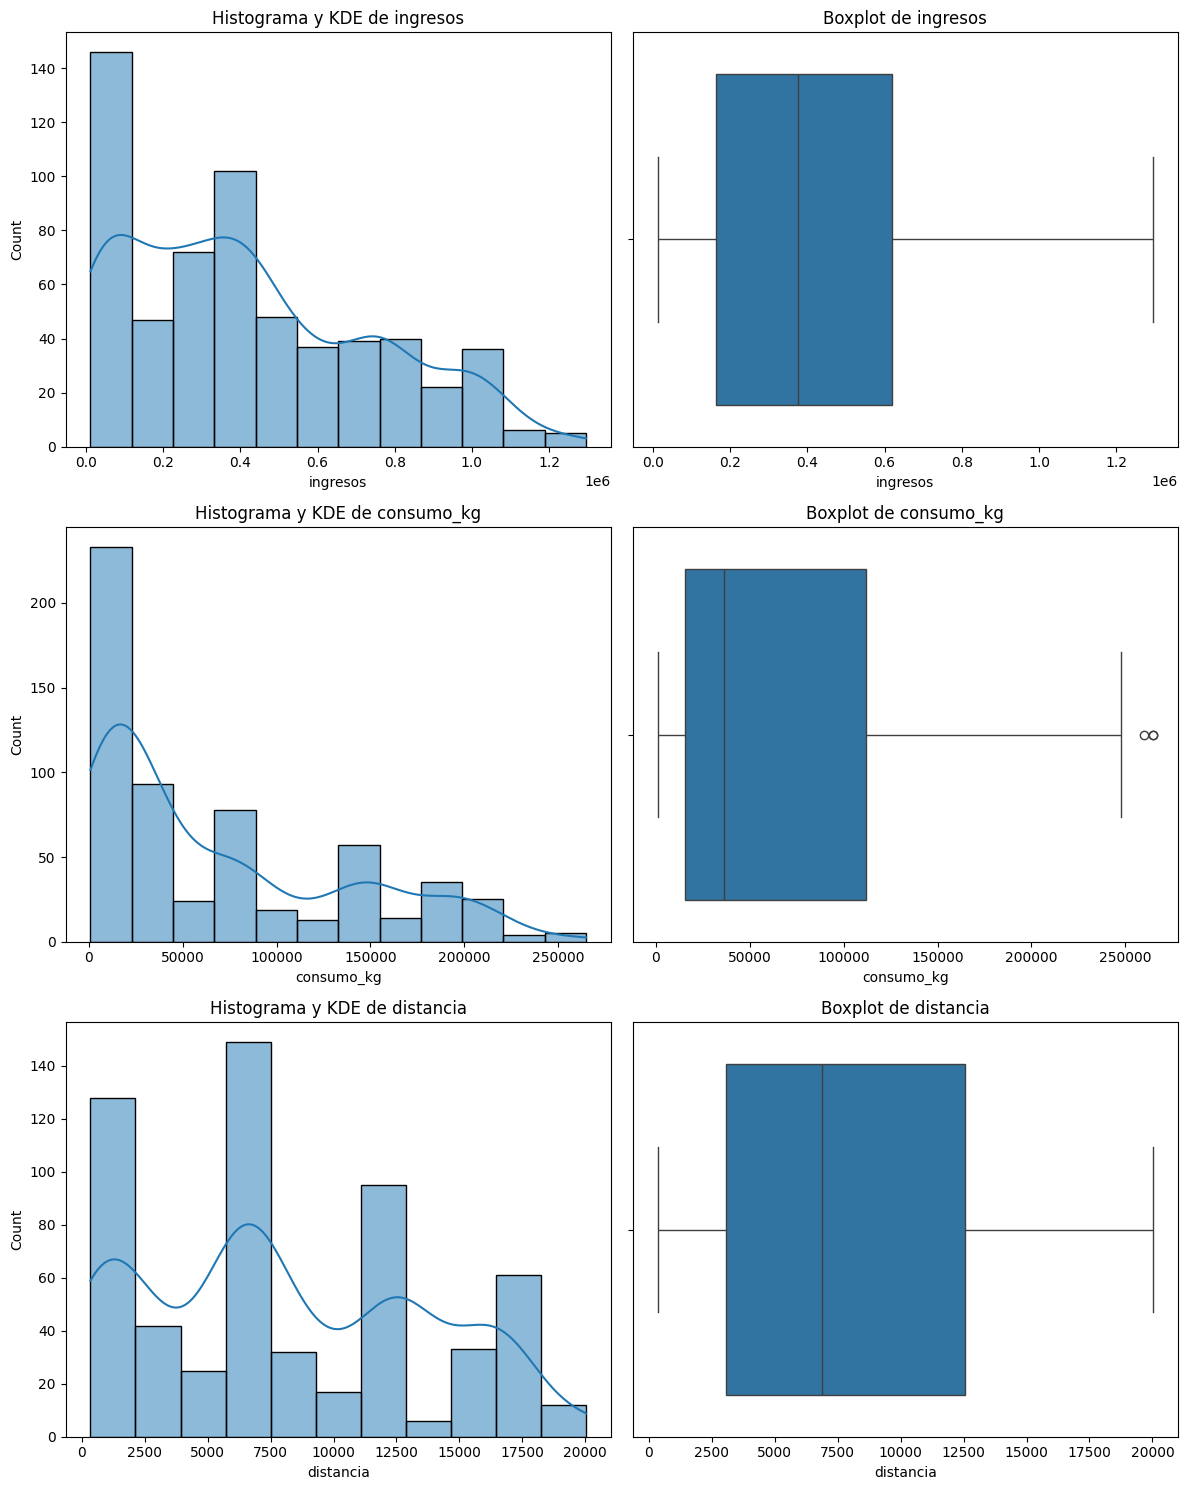

In [73]:
plot_combined_graphs(df_air_jun, ["ingresos", "consumo_kg", "distancia"])

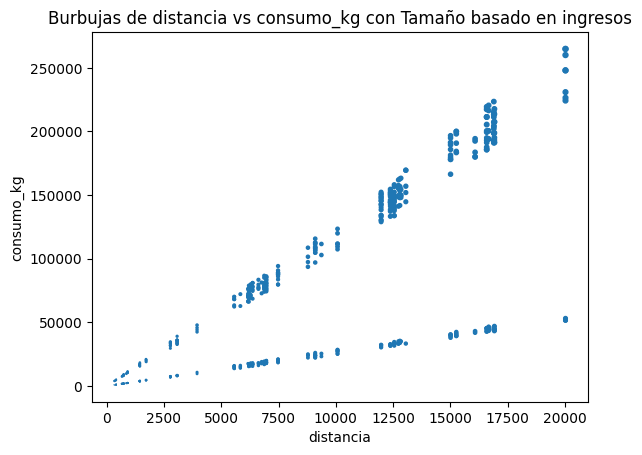

In [74]:
bubble_plot(df_air_jun, "distancia", "consumo_kg", "ingresos", scale=100000)

In [75]:
# vemos correlacion entre distancia y consumo. Pero hay unos viajes mas eficientes que seria interesante detectar

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [76]:
def clasificar_vuelo(distancia): 
    if distancia <=  5000:
        return "corta_distancia"
    elif distancia < 10000:
        return "media_distancia"
    elif distancia < 15000:
        return "larga_distancia"
    else:
        return "muy_larga_distancia"
df_air_jun["cat_vuelo"] = df_air_jun["distancia"].apply(clasificar_vuelo)
df_air_jun.head(5)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,corta_distancia
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,larga_distancia
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,media_distancia
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,media_distancia
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,media_distancia


respuesta corta_distancia


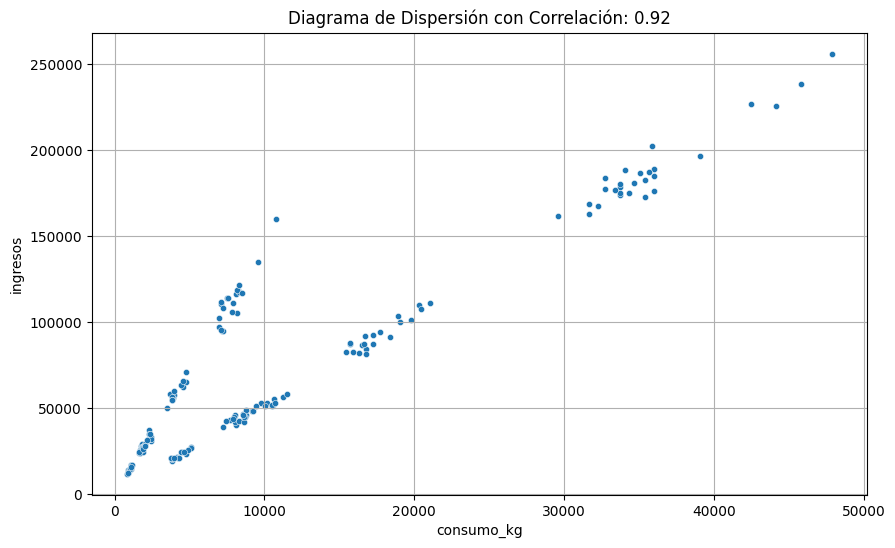

respuesta larga_distancia


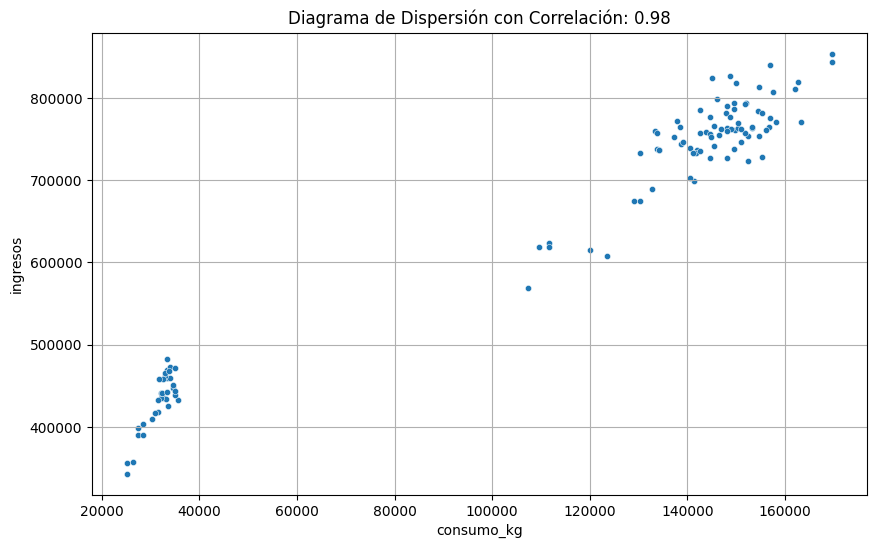

respuesta media_distancia


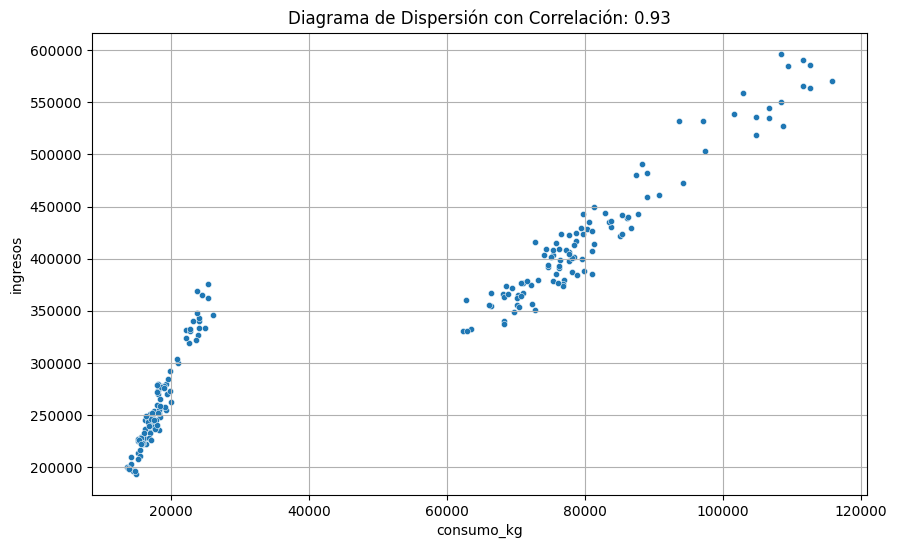

respuesta muy_larga_distancia


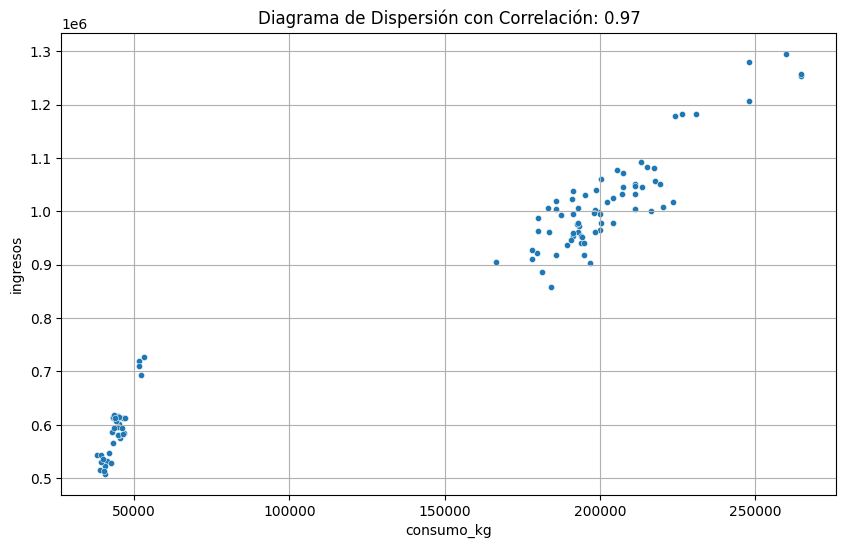

In [77]:
col_directora1 = "cat_vuelo"
col_1="ingresos"
col_2="consumo_kg"
diccionario_multivariante={}
for valor in df_air_jun[col_directora1].unique():
    diccionario_multivariante[valor] =df_air_jun.loc[df_air_jun[col_directora1]==valor,[col_2, col_1]]
for valor, df_datos in diccionario_multivariante.items():
    print(f"respuesta {valor}")
    grafico_dispersion_con_correlacion(df_datos, col_2, col_1, tamano_puntos=20, mostrar_correlacion=True)

In [78]:
# Vemos que hay 2 tipos de viajes mas rentables y menos

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

In [79]:
df_air_jun["ing_kg_consumido"] = df_air_jun["ingresos"]/df_air_jun["consumo_kg"]
df_air_jun.head(5)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,ing_kg_consumido
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,corta_distancia,13.835678
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,larga_distancia,13.994604
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,media_distancia,5.343473
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,media_distancia,13.704256
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,media_distancia,5.092391


In [80]:
df_air_jun["kg_consumido_por_km"] = df_air_jun["consumo_kg"]/df_air_jun["distancia"]
df_air_jun.head(5)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,ing_kg_consumido,kg_consumido_por_km
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,corta_distancia,13.835678,2.502900
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,larga_distancia,13.994604,2.628288
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,media_distancia,5.343473,12.022400
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,media_distancia,13.704256,2.673000
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,media_distancia,5.092391,11.512800


In [81]:
df_air_jun.describe()

,distancia,consumo_kg,duracion,ingresos,ing_kg_consumido,kg_consumido_por_km
count,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000
mean,8071.003333,68240.520508,635.873333,4.187689e+05,8.904848,7.934756
std,5550.244086,67441.849592,450.474786,3.182858e+05,4.407691,4.537013
min,344.000000,835.920000,42.000000,1.179785e+04,4.554666,2.430000
25%,3073.000000,15733.520400,224.000000,1.627668e+05,5.131672,2.660600
50%,6877.000000,36033.998000,542.000000,3.754817e+05,5.459427,11.086400
75%,12553.000000,111717.652800,876.000000,6.188420e+05,13.855693,11.906800
max,20029.000000,264876.314560,1721.000000,1.295516e+06,16.213469,13.224640


<Axes: >

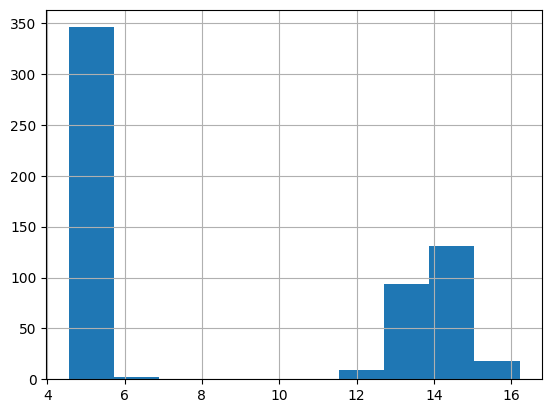

In [82]:
df_air_jun["ing_kg_consumido"].hist() # hay que detectar los vuelos eficientes valor de menor a 6

In [83]:
condicion = df_air_jun["ing_kg_consumido"] < 6

df_air_jun[condicion]


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,ing_kg_consumido,kg_consumido_por_km
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,media_distancia,5.343473,12.022400
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,media_distancia,5.092391,11.512800
7,PamPangea,París,Melbourne,16925,Airbus A380,True,217722.658400,1328,1056735.47,Pam_PaMe_11380,Jun23,muy_larga_distancia,4.853585,12.863968
9,Airnar,Ginebra,Cádiz,1725,Airbus A380,False,20339.820000,135,110108.07,Air_GiCa_11380,Jun23,corta_distancia,5.413424,11.791200
11,MoldaviAir,Londres,Bali,12553,Airbus A380,False,156721.694400,856,764998.83,Mol_LoBa_11380,Jun23,larga_distancia,4.881257,12.484800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,PamPangea,Nueva York,Melbourne,16082,Boeing 747,True,194337.718432,1272,952688.76,Pam_NuMe_10747,Jun23,muy_larga_distancia,4.902233,12.084176
593,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,108387.600400,626,550268.31,Tab_GiLo_11380,Jun23,media_distancia,5.076857,11.906800
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,corta_distancia,5.067440,11.906800
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,larga_distancia,5.196054,11.086400


<Axes: >

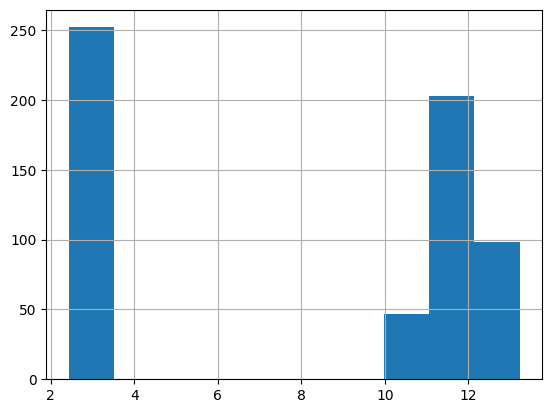

In [84]:
df_air_jun["kg_consumido_por_km"].hist()

In [85]:
condicion2 = df_air_jun["kg_consumido_por_km"] < 4

df_air_jun[condicion2]

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,ing_kg_consumido,kg_consumido_por_km
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,corta_distancia,13.835678,2.502900
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,larga_distancia,13.994604,2.628288
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,media_distancia,13.704256,2.673000
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737,Jun23,muy_larga_distancia,13.698419,2.653560
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320,Jun23,corta_distancia,15.083938,2.660600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,FlyQ,Roma,Barcelona,859,Boeing 737,False,2129.117400,85,31227.48,Fly_RoBa_10737,Jun23,corta_distancia,14.666866,2.478600
592,PamPangea,Melbourne,Ginebra,16674,Boeing 737,True,46352.386080,1466,583465.41,Pam_MeGi_10737,Jun23,muy_larga_distancia,12.587602,2.779920
594,PamPangea,Londres,Ginebra,739,Airbus A320,False,2021.830100,73,28007.41,Pam_LoGi_11320,Jun23,corta_distancia,13.852504,2.735900
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,larga_distancia,13.289303,2.653560


In [87]:
df_objetivo= df_air_jun[condicion].merge(df_air_jun[condicion2], how="outer")
df_objetivo

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,cat_vuelo,ing_kg_consumido,kg_consumido_por_km
0,Airnar,Bali,Cincinnati,15011,Airbus A380,True,185882.293792,1200,918577.24,Air_BaCi_11380,Jun23,muy_larga_distancia,4.941715,12.383072
1,Airnar,Bali,Cincinnati,15011,Airbus A380,True,189491.658720,1200,937528.57,Air_BaCi_11380,Jun23,muy_larga_distancia,4.947598,12.623520
2,Airnar,Bali,Cincinnati,15011,Airbus A380,True,191296.341184,1200,958617.02,Air_BaCi_11380,Jun23,muy_larga_distancia,5.011162,12.743744
3,Airnar,Bali,Cincinnati,15011,Boeing 737,True,37935.799200,1340,544087.81,Air_BaCi_10737,Jun23,muy_larga_distancia,14.342332,2.527200
4,Airnar,Bali,Cincinnati,15011,Boeing 737,True,39073.873176,1340,515892.83,Air_BaCi_10737,Jun23,muy_larga_distancia,13.203012,2.603016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,TabarAir,Roma,Los Angeles,10077,Boeing 747,False,109569.236400,691,619222.23,Tab_RoLo_10747,Jun23,larga_distancia,5.651424,10.873200
596,TabarAir,Roma,Nueva York,6877,Airbus A320,True,18131.238008,618,279534.74,Tab_RoNu_11320,Jun23,media_distancia,15.417300,2.636504
597,TabarAir,Roma,Nueva York,6877,Airbus A380,False,86652.950800,478,429135.08,Tab_RoNu_11380,Jun23,media_distancia,4.952342,12.600400
598,TabarAir,Roma,Nueva York,6877,Boeing 737,False,18382.221000,542,248170.66,Tab_RoNu_10737,Jun23,media_distancia,13.500581,2.673000


In [ ]:
df_objetivo["aircompany"].value_counts()/len(df_objetivo)


aircompany
TabarAir      0.236667
MoldaviAir    0.221667
PamPangea     0.195000
FlyQ          0.180000
Airnar        0.166667
Name: count, dtype: float64